In [17]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

### Load the data from the experiments

In [18]:
folder = Path("storage/testing_data/")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df["stride_series"].replace(np.NaN, False, inplace=True)
df['train_exc_limit'].replace(np.NaN, 0, inplace=True)
df["pretrained"].replace(np.NaN, False, inplace=True)
df["cv_rep"].replace(np.NaN, False, inplace=True)
df["eq_wdw_length"] = df["window_length"]*df["window_time_stride"]
df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,ts,res,CBF,0.25,20,128,False,10,1,1,...,200.0,384.0,384.0,3.729552,159.544045,163.273597,False,NaN,NaN,10
1,ts,res,CBF,0.25,20,128,False,30,1,1,...,200.0,384.0,384.0,4.236819,164.178055,168.414874,False,NaN,NaN,30
2,ts,res,CBF,0.25,20,128,False,50,1,1,...,200.0,384.0,384.0,3.921670,167.323654,171.245323,False,NaN,NaN,50
3,ts,res,CBF,0.25,20,128,False,70,1,1,...,200.0,384.0,384.0,4.111738,174.713792,178.825530,False,NaN,NaN,70
0,df,res,CBF,0.25,20,128,False,10,1,1,...,200.0,384.0,384.0,4.250741,451.829222,456.079963,False,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,df,cnn,CBF,0.25,20,128,False,10,7,1,...,192.0,192.0,384.0,4.524686,48.399613,52.924299,False,NaN,NaN,70
14,df,cnn,CBF,0.25,20,128,False,10,7,1,...,192.0,192.0,384.0,4.704007,48.241194,52.945201,False,NaN,NaN,70
15,df,cnn,CBF,0.25,20,128,False,10,7,1,...,192.0,192.0,384.0,4.428788,48.214849,52.643637,True,NaN,NaN,70
16,df,cnn,CBF,0.25,20,128,False,10,7,1,...,200.0,384.0,384.0,3.693037,116.436532,120.129569,False,NaN,NaN,70


In [19]:
# check for duplicate entries
file_entries = len(df)
df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).first().reset_index()
unique_entries = len(df)
print(f"{file_entries - unique_entries} duplicate entries removed")
# df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
#                  'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).count()
# df[df["val_size"] > 1]

0 duplicate entries removed


In [20]:
# show pretrained encoders
df[df["pretrain_mode"]==True][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', 'window_time_stride', 'window_patt_stride', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,window_time_stride,window_patt_stride,pretrained,cv_rep
36,df,cnn,CBF,True,10,7,1,False,0.0
37,df,cnn,CBF,True,10,7,1,False,0.0
74,df,res,CBF,True,10,7,1,False,0.0
75,df,res,CBF,True,10,7,1,False,0.0


In [21]:
df[np.logical_and(df["stride_series"]==False, df["pretrain_mode"]==False)]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,3.876290,116.678040,120.554330,NaN,NaN,10
1,df,cnn,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.572658,127.082472,131.655130,NaN,NaN,10
2,df,cnn,CBF,False,10,False,3,1,32.0,False,...,4.0,200.0,384.0,384.0,3.910908,115.486716,119.397624,NaN,NaN,30
3,df,cnn,CBF,False,10,False,3,1,32.0,False,...,4.0,200.0,384.0,384.0,3.914922,127.057226,130.972148,NaN,NaN,30
4,df,cnn,CBF,False,10,False,5,1,32.0,False,...,4.0,200.0,384.0,384.0,3.791460,115.992600,119.784060,NaN,NaN,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,ts,res,CBF,False,70,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.111738,174.713792,178.825530,NaN,NaN,70
84,ts,rnn,CBF,False,10,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.893466,126.451568,131.345034,NaN,NaN,10
85,ts,rnn,CBF,False,30,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,3.968187,130.608490,134.576677,NaN,NaN,30
86,ts,rnn,CBF,False,50,False,1,1,32.0,False,...,4.0,200.0,384.0,384.0,4.035587,140.369334,144.404921,NaN,NaN,50


In [22]:
cols = ['test_acc', 'test_f1', 'test_auroc', 'val_acc', 'val_f1', 'val_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length',
       'stride_series', 'window_time_stride', 'window_patt_stride',
       'train_exc_limit', 'pretrained', 'cv_rep', 'val_size', 'max_epochs',
       'batch_size', 'learning_rate', 'random_state', 'nepochs', 'best_model',
       'total_params', 'trainable_params', 'metrics_csv', 'val_acc', 'val_f1',
       'val_auroc', 'test_acc', 'test_f1', 'test_auroc', 'exc',
       'train_strat_size', 'train_event_mult', 'nevents_test',
       'nevents_train_lim', 'nevents_train_tot', 'time_dm', 'time_train',
       'time_total', 'val_mse', 'val_r2', 'eq_wdw_length'],
      dtype='object')

# Section 5.1: Time Dilation Effects

- Check the dependence of time dilation on classifier performance

In [23]:
# Filter the data
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_patt_stride"] == 1]
data = data[data["pretrained"] == False]

data = data[data["dataset"] == "CBF"]

In [24]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "eq_wdw_length"])[cols].mean()

test_acc   test_f1  test_auroc   val_acc  \
dataset mode arch eq_wdw_length                                             
CBF     df   cnn  10             0.553597  0.553597    0.259119  0.546724   
                  30             0.577848  0.577848    0.312293  0.572313   
                  50             0.602157  0.602157    0.347911  0.603666   
                  70             0.616319  0.616319    0.377772  0.611410   
             res  10             0.454394  0.454394    0.250306  0.479487   
                  30             0.616802  0.616802    0.340262  0.640065   
                  50             0.648225  0.648225    0.359844  0.663544   
                  70             0.654648  0.654648    0.390309  0.670212   
        ts   cnn  10             0.405682  0.405682    0.250065  0.408221   
                  30             0.541398  0.541398    0.301863  0.528339   
                  50             0.622647  0.622647    0.345343  0.631120   
                  70             0.659916  0.659916    0.373742  0.655664   
             res  10             0.336395  0.336395    0.229472  0.385348   
                  30             0.524189  0.524189    0.301222  0.499430   
                  50             0.554855  0.554855    0.330248  0.613442   
                  70             0.575933  0.575933    0.360499  0.587368   
             rnn  10             0.345031  0.345031    0.223223  0.358242   
                  30             0.353983  0.353983    0.245419  0.396824   
                  50             0.520960  0.520960    0.305583  0.481711   
                  70             0.488347  0.488347    0.289157  0.473431   

                                   val_f1  val_auroc  
dataset mode arch eq_wdw_length                       
CBF     df   cnn  10             0.546724   0.248195  
                  30             0.572313   0.318578  
                  50             0.603666   0.314447  
                  70             0.611410   0.330865  
             res  10             0.479487   0.297494  
                  30             0.640065   0.337505  
                  50             0.663544   0.336962  
                  70             0.670212   0.357884  
        ts   cnn  10             0.408221   0.271613  
                  30             0.528339   0.315458  
                  50             0.631120   0.375216  
                  70             0.655664   0.407793  
             res  10             0.385348   0.269668  
                  30             0.499430   0.284093  
                  50             0.613442   0.354968  
                  70             0.587368   0.402339  
             rnn  10             0.358242   0.272928  
                  30             0.396824   0.295782  
                  50             0.481711   0.338992  
                  70             0.473431   0.324668

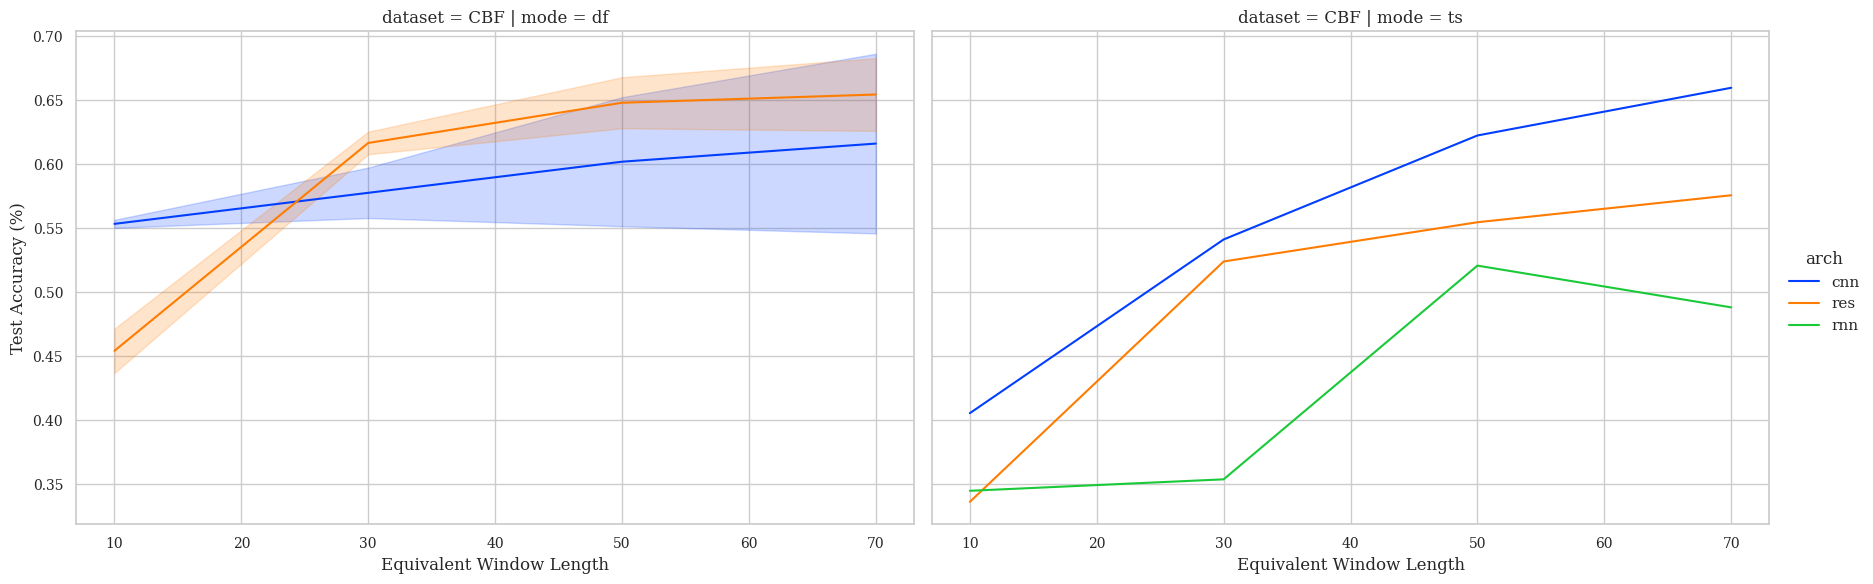

In [25]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="eq_wdw_length", y="test_acc", hue='arch', kind="line", palette="bright", col="mode", row="dataset",
                height=6, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Equivalent Window Length");

g.savefig("figures/time_dilation.pdf", bbox_inches='tight')

# Section 5.2: Pattern Stride Effects

In [26]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_time_stride"] == 7]
data = data[data["pretrained"] == False]

data = data[data["dataset"] == "CBF"]

In [27]:
# Generate a table
data.groupby(["dataset", "mode", "arch", "window_patt_stride"])[cols].mean()

test_acc   test_f1  test_auroc  \
dataset mode arch window_patt_stride                                   
CBF     df   cnn  1                   0.616319  0.616319    0.377772   
                  2                   0.604254  0.604254    0.382241   
                  3                   0.531024  0.531024    0.364381   
                  5                   0.505641  0.505641    0.354080   
             res  1                   0.654648  0.654648    0.390309   
                  2                   0.672510  0.672510    0.384691   
                  3                   0.638842  0.638842    0.376062   
                  5                   0.622371  0.622371    0.377116   

                                       val_acc    val_f1  val_auroc  
dataset mode arch window_patt_stride                                 
CBF     df   cnn  1                   0.611410  0.611410   0.330865  
                  2                   0.599674  0.599674   0.343654  
                  3                   0.542217  0.542217   0.351992  
                  5                   0.500570  0.500570   0.343373  
             res  1                   0.670212  0.670212   0.357884  
                  2                   0.660269  0.660269   0.329455  
                  3                   0.647107  0.647107   0.340243  
                  5                   0.633700  0.633700   0.345781

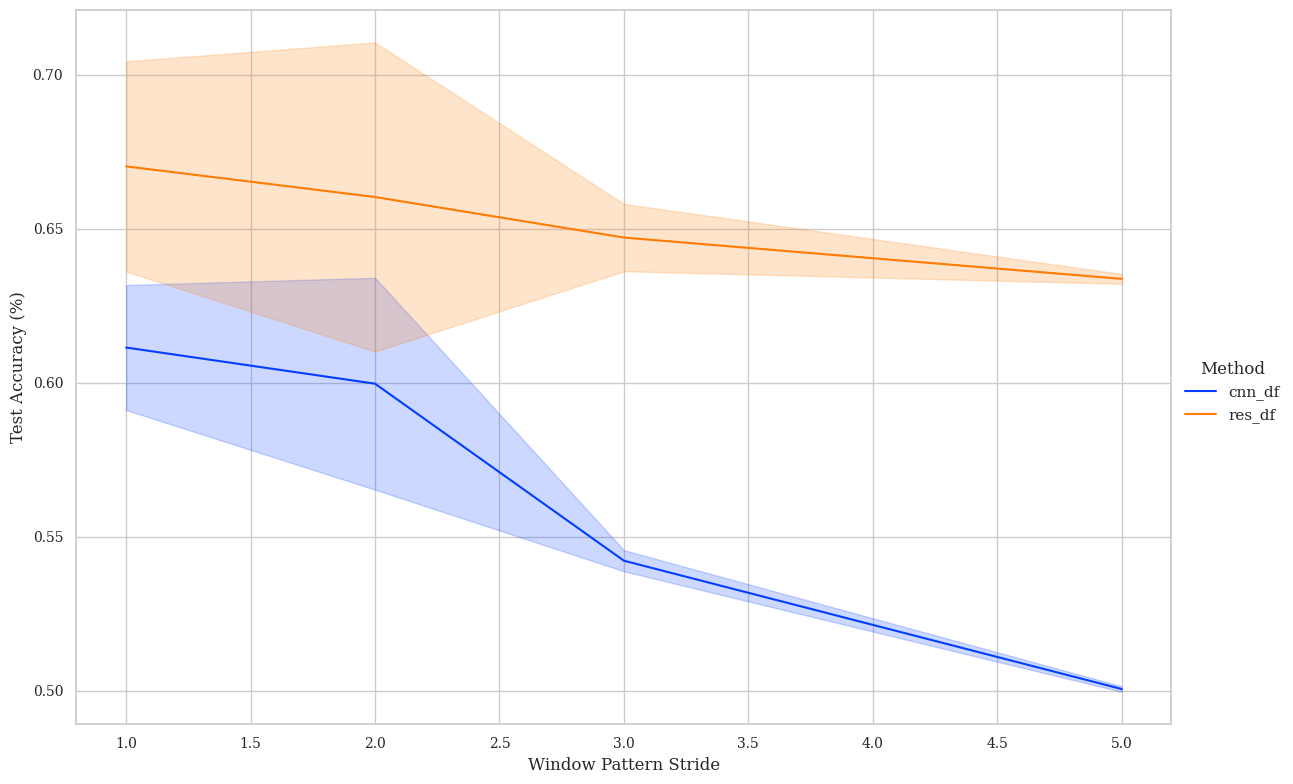

In [28]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="window_patt_stride", y="val_acc", hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Window Pattern Stride");

g.savefig("figures/pattern_stride_acc.pdf", bbox_inches='tight')

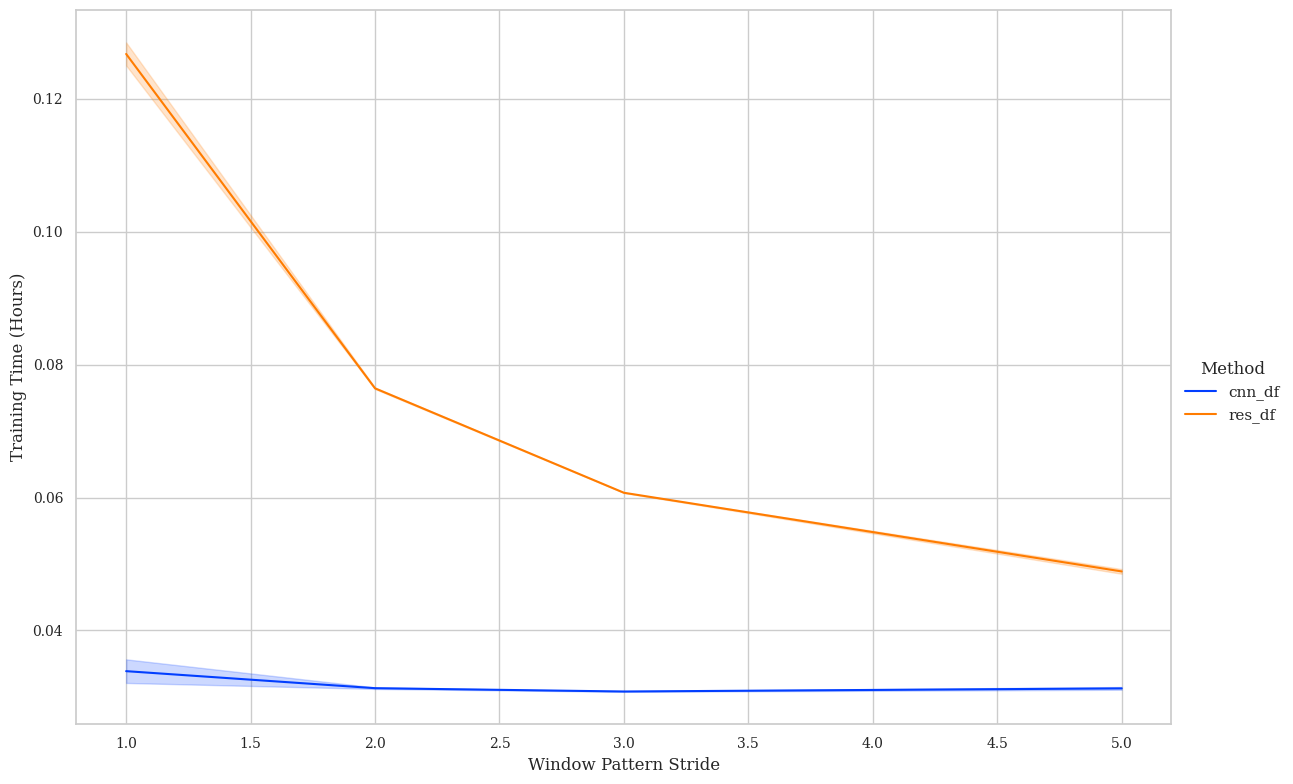

In [29]:
# Generate a plot

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

data["Time"] = data["time_train"]/60/60

g = sns.relplot(data=data, x="window_patt_stride", y='Time', hue='Method', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, markers="True", facet_kws={"despine": False})

g.set_ylabels("Training Time (Hours)")
g.set_xlabels("Window Pattern Stride");

g.savefig("figures/pattern_stride_time.pdf", bbox_inches='tight')

# Section 5.3: Self-Supervised Pretrain Effects

In [30]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

data = data[data["dataset"] == "CBF"]

In [31]:
data.groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

test_acc  \
dataset mode arch pretrained stride_series train_exc_limit             
CBF     df   cnn  False      False         4.0              0.418821   
                                           8.0              0.450192   
                                           16.0             0.519710   
                                           32.0             0.616319   
                  True       False         4.0              0.519019   
                                           8.0              0.601866   
                                           16.0             0.673414   
                                           32.0             0.742411   
                             True          4.0              0.513255   
                                           8.0              0.603503   
                                           16.0             0.688370   
                                           32.0             0.754299   
             res  False      False         4.0              0.467891   
                                           8.0              0.508472   
                                           16.0             0.542399   
                                           32.0             0.654648   
                  True       False         4.0              0.506587   
                                           8.0              0.592576   
                                           16.0             0.620322   
                                           32.0             0.690940   
                             True          4.0              0.520336   
                                           8.0              0.573668   
                                           16.0             0.611487   
                                           32.0             0.708723   

                                                             test_f1  \
dataset mode arch pretrained stride_series train_exc_limit             
CBF     df   cnn  False      False         4.0              0.418821   
                                           8.0              0.450192   
                                           16.0             0.519710   
                                           32.0             0.616319   
                  True       False         4.0              0.519019   
                                           8.0              0.601866   
                                           16.0             0.673414   
                                           32.0             0.742411   
                             True          4.0              0.513255   
                                           8.0              0.603503   
                                           16.0             0.688370   
                                           32.0             0.754299   
             res  False      False         4.0              0.467891   
                                           8.0              0.508472   
                                           16.0             0.542399   
                                           32.0             0.654648   
                  True       False         4.0              0.506587   
                                           8.0              0.592576   
                                           16.0             0.620322   
                                           32.0             0.690940   
                             True          4.0              0.520336   
                                           8.0              0.573668   
                                           16.0             0.611487   
                                           32.0             0.708723   

                                                            test_auroc  \
dataset mode arch pretrained stride_series train_exc_limit               
CBF     df   cnn  False      False         4.0                0.313047   
                                           8.0                0.302592   
                  

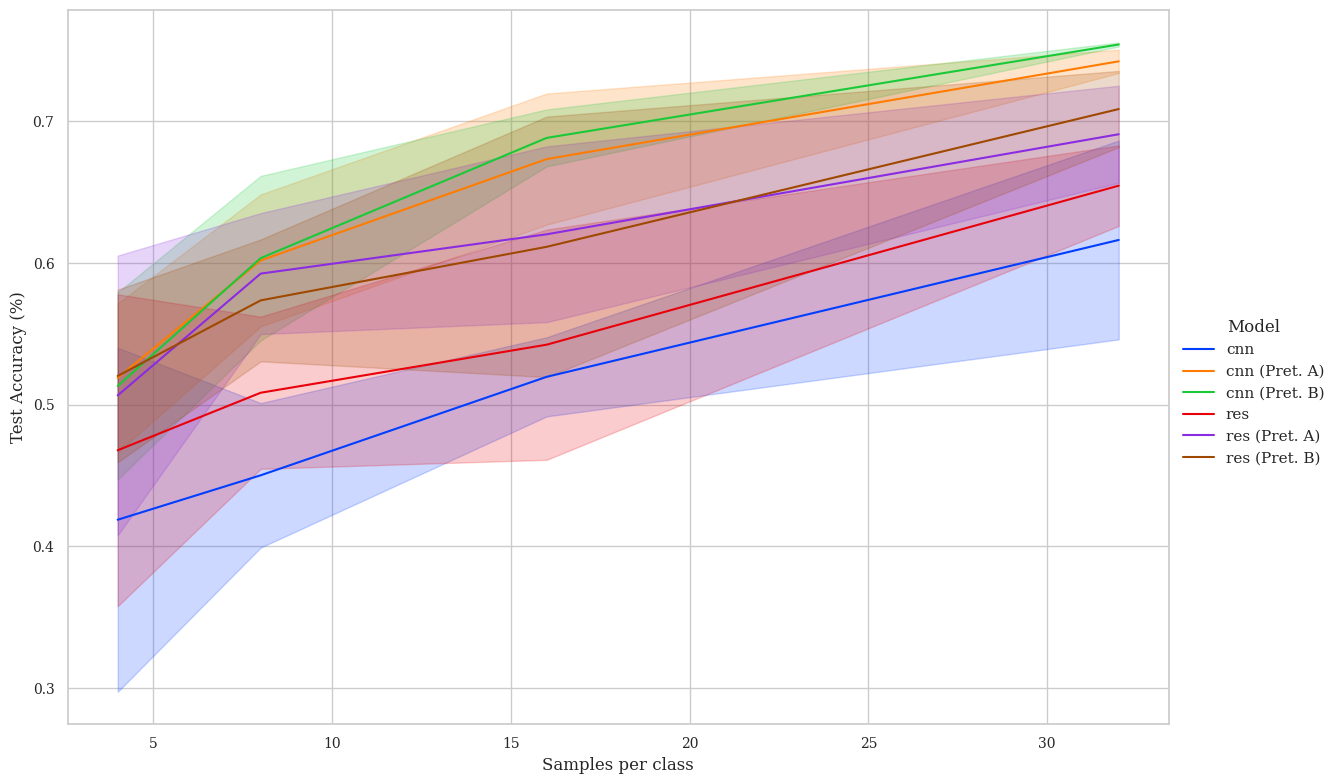

In [32]:
# Generate a plot
data["Model"] = data["arch"] + " " + data["pretrained"].replace({True: "(Pret. ", False: ""}) + data["stride_series"].replace({True: "B)", False: "A)"})
data["Model"].replace({"cnn A)": "cnn", "res A)": "res"}, inplace=True)
data.sort_values(['Model'], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=data, x="train_exc_limit", y="test_acc", hue='Model', kind="line", palette="bright",
                height=8, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Samples per class");

g.savefig("figures/pretrain.pdf", bbox_inches='tight')